## Age data

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('../data/train_users_2.csv')
print df.shape

(213451, 16)


### Show how many age data are missing in pie chart

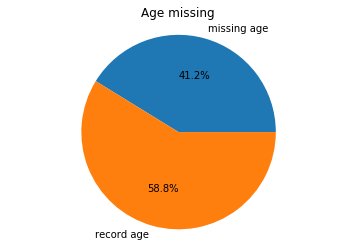

In [84]:
missing_age_count = df.age.isnull().sum()
record_age_count = df.age.shape[0] - missing_age_count
var = [missing_age_count, record_age_count]
lable = ['missing age', 'record age']
fig1, ax1 = plt.subplots()
ax1.pie(var,labels = lable,autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Age missing')

### Analyze age Distribution

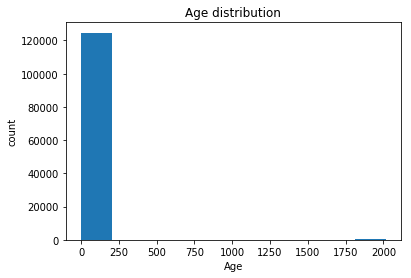

In [85]:
plt.hist(df.age.dropna()) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

There are some outliers in age distribution. Need to delete ange > 123, then plot again

In [86]:
df[df.age > 122]['age'].describe()

count     781.000000
mean     2006.308579
std        95.711349
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

The world largest age is 122 in record. But there are 781 are greater than it. And some of ages are 2014. The needs to be set to nan

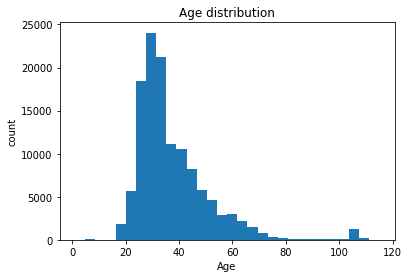

In [87]:
df.loc[df.age > 122, 'age'] = np.nan
plt.hist(df.age.dropna(),bins =30) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

In [88]:
print df.head(20)

            id date_account_created  timestamp_first_active  \
0   gxn3p5htnn              28/6/10            2.010000e+13   
1   820tgsjxq7              25/5/11            2.010000e+13   
2   4ft3gnwmtx              28/9/10            2.010000e+13   
3   bjjt8pjhuk              5/12/11            2.010000e+13   
4   87mebub9p4              14/9/10            2.010000e+13   
5   osr2jwljor               1/1/10            2.010000e+13   
6   lsw9q7uk0j               2/1/10            2.010000e+13   
7   0d01nltbrs               3/1/10            2.010000e+13   
8   a1vcnhxeij               4/1/10            2.010000e+13   
9   6uh8zyj2gn               4/1/10            2.010000e+13   
10  yuuqmid2rp               4/1/10            2.010000e+13   
11  om1ss59ys8               5/1/10            2.010000e+13   
12  k6np330cm1               5/1/10            2.010000e+13   
13  dy3rgx56cu               5/1/10            2.010000e+13   
14  ju3h98ch3w               7/1/10            2.010000

### Train a modle to get the the missing age
relavent feature can be: date_account_created signup_method signup_flow language affiliate_channel affiliate_provider first_affiliate_tracked signup_app first_device_type first_browser

In [89]:
df.drop(['id','country_destination','date_first_booking'],1,inplace=True)


Delete the row has NaN data, split feature and lable

In [90]:
df.replace('-unknown-', np.nan, inplace=True)
age_relat_data = df.dropna()
Y = age_relat_data.age
age_relat_data.drop(['age'],1,inplace=True)


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
Y.shape

(112564,)

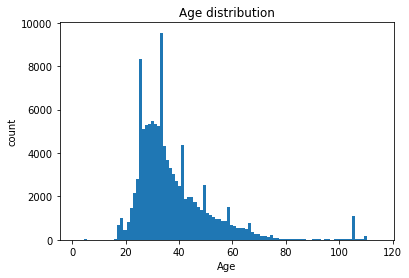

In [92]:
plt.hist(Y,bins =100) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

One hot encoding all age related data

In [93]:
oh_language = pd.get_dummies(age_relat_data.language, prefix="language")
oh_signup_method = pd.get_dummies(age_relat_data.signup_method, prefix="signup_method")
oh_affiliate_channel = pd.get_dummies(age_relat_data.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(age_relat_data.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(age_relat_data.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(age_relat_data.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(age_relat_data.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(age_relat_data.first_browser, prefix="first_browser")
# age_relat_data.drop(['date_account_created', 'signup_method', 'signup_flow',
#          'language', 'affiliate_channel', 
#          'affiliate_provider', 'first_affiliate_tracked', 
#          'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
age_relat_data = pd.concat([oh_language,oh_signup_method,
                      oh_affiliate_channel,oh_affiliate_provider,
                     oh_first_affiliate_tracked,oh_signup_app,
                     oh_first_device_type,oh_first_browser],axis=1)

Train a model to predict age using SGDRegresion

In [94]:
age_relat_data.shape

(112564, 113)

## SGDRegression to predict age

In [95]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

sgdr = linear_model.SGDRegressor()
x_train, x_test, y_train, y_test = train_test_split(age_relat_data, Y, test_size=0.3)
sgdr.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [96]:
from sklearn.metrics import r2_score
y_pred= sgdr.predict(x_test)
print y_pred
r2_score

[ 36.39432148  37.00325817  36.18388671 ...,  39.10138624  31.60767747
  42.36117806]


In [97]:
print y_test.head(3)

21236    29.0
40120    29.0
57310    51.0
Name: age, dtype: float64


##  classification to predict age

In [98]:
sgdc = linear_model.SGDClassifier(loss="log", penalty="l2")
sgdc.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [102]:
#calulate overall Scoring .
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
y_predict = sgdc.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.03921569
  0.05182927  0.06766917  0.04953502  0.07446809  0.07142857  0.03833333
  0.03645833  0.05180748  0.06338028  0.034375    0.03210464  0.05714286
  0.0265544   0.03139428  0.          0.          0.00609756  0.          0.
  0.          0.          0.          0.07692308  0.          0.          0.
  0.          0.02276708  0.          0.          0.          0.          0.
  0.0155642   0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.


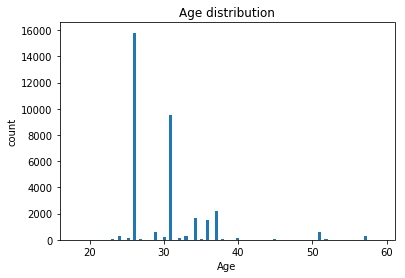

In [100]:
plt.hist(y_predict,bins =100) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

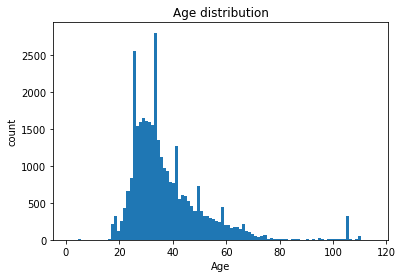

In [101]:
plt.hist(y_test,bins =100) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel("count")
plt.show()